In [17]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import fiona
import os 
import json

## 데이터 로드

In [2]:
# 경로설정
root_path = os.getcwd() # 현재 디렉터리
data_path = os.path.join(root_path,'dataset') #데이터셋 폴더
os.chdir(data_path)

In [48]:
#geopandas 안쓰고 로드하기
geometry_gj = json.load(open('HangJeongDong_ver20220701.geojson',encoding='utf-8'))
mapo_one = pd.read_csv('마포구_행정동별_1인가구수_2018.csv',encoding='cp949')
mapo_one.head()

,dong,people
0,아현동,3160
1,공덕동,8083
2,도화동,3601
3,용강동,3142
4,대흥동,4715


- mapo_one 데이터프레임 내에 망원 제 1동 < 이런식으로 컬럼이 되어 있어 그래프가 그려지지 않음!
- head()만 보지 말고 value_counts()써서 전처리 해줄것

In [51]:
mapo_one.value_counts()

dong  people
공덕동   8083      1
대흥동   4715      1
도화동   3601      1
망원1동  4963      1
망원2동  2951      1
상암동   4140      1
서강동   5077      1
서교동   8467      1
성산1동  4073      1
성산2동  7551      1
신수동   3529      1
아현동   3160      1
연남동   4723      1
염리동   2430      1
용강동   3142      1
합정동   4875      1
dtype: int64

In [50]:
# 전처리
#'망원제1동''망원제2동''성산제1동''성산제2동']
mapo_one['dong'] = mapo_one['dong'].str.replace('망원제1동','망원1동')
mapo_one['dong'] = mapo_one['dong'].str.replace('망원제2동','망원2동')
mapo_one['dong'] = mapo_one['dong'].str.replace('성산제1동','성산1동')
mapo_one['dong'] = mapo_one['dong'].str.replace('성산제2동','성산2동')

In [45]:
mapo_one.shape

(16, 2)

- plotly의 choropleth로 시각화 하려면, 무조건 'FeatureCollection'형태로 불러와야 함

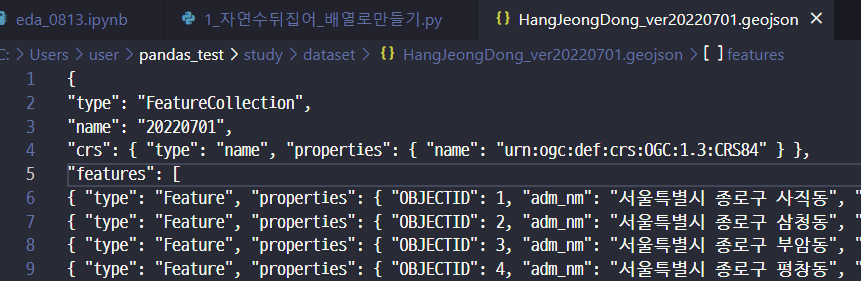

- geometry가 geojson이어야 하고 json으로 불러와야함

## 데이터 불러와서 geopandas 이용해서 필요한 지역만 추출후 geojson으로 저장

In [20]:
geo = gpd.read_file('HangJeongDong_ver20220701.geojson')
geo.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


<AxesSubplot:>

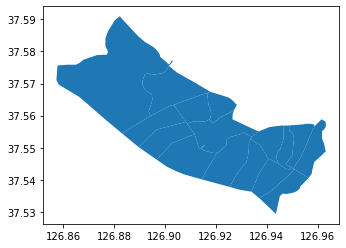

In [26]:
# 마포구만 뽑아내기 
geo['dong'] = geo['adm_nm'].str.replace('서울특별시 마포구','') # 새 컬럼 생성
mapogu = geo[geo['sggnm']=='마포구'] # 구이름 - 마포구인 객체만 뽑기
mapo_geo = mapogu[['geometry','dong']] # dong이랑 geometry속성만 뽑음
mapo_geo.plot()

In [30]:
mapo_geo

,geometry,dong
206,"MULTIPOLYGON (((126.94453 37.54515, 126.94476 ...",용강동
207,"MULTIPOLYGON (((126.94681 37.55685, 126.94650 ...",대흥동
208,"MULTIPOLYGON (((126.94968 37.54382, 126.94923 ...",염리동
209,"MULTIPOLYGON (((126.94073 37.54661, 126.93877 ...",신수동
210,"MULTIPOLYGON (((126.91353 37.54948, 126.91166 ...",서교동
211,"MULTIPOLYGON (((126.91353 37.54948, 126.91440 ...",합정동
212,"MULTIPOLYGON (((126.90880 37.55742, 126.91166 ...",망원1동
213,"MULTIPOLYGON (((126.90430 37.56240, 126.90819 ...",망원2동
214,"MULTIPOLYGON (((126.92720 37.56183, 126.92714 ...",연남동
215,"MULTIPOLYGON (((126.91760 37.55884, 126.91701 ...",성산1동


In [27]:
mapo_geo.columns

Index(['geometry', 'dong'], dtype='object')

In [29]:
# 공간데이터를 geojson으로 저장
mapo_geo.to_file('mapogu_shape.geojson',driver='GeoJSON')

## 전처리

- geometry 데이터와 속성정보 데이터에서 컬럼명이 일치해야됨
- mapo_geo 내의 dong과 mapo_one의 dong이 일치해야함
- 일치하지 않은 경우에는 전처리필수

## Choropleth 시각화

In [52]:
geometry_gj = json.load(open('mapogu_shape.geojson',encoding='utf-8'))

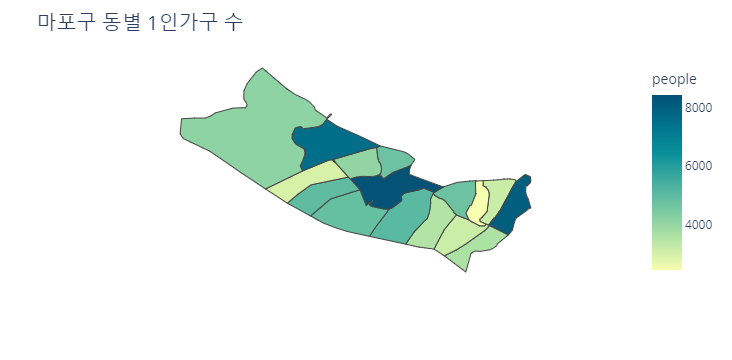

In [54]:
fig = px.choropleth(mapo_one, geojson = geometry_gj, locations='dong',color='people',
                   color_continuous_scale='bluyl',
                   featureidkey='properties.dong')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='마포구 동별 1인가구 수', title_font_size=20)

## 결과
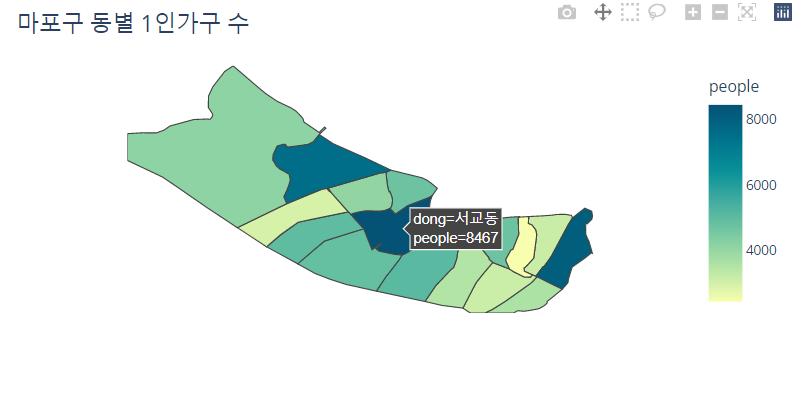